## 2.4 Số hóa dữ liệu thu được và Phân tích dữ liệu trên bằng Python.  
Mỗi phân tích đều bao gồm các nội dung theo yêu cầu sau: 
- Mô tả về dữ liệu
- Thực hiện các thống kê căn bản 
- Tìm mối tương quan giữa các câu hỏi khảo sát và kết quả 
- Xác định các yếu tố quan trọng ảnh hưởng đến kết quả 
- Trực quan hóa dữ liệu và kết quả 


### 2.4.1 Mô tả dữ liệu
- Dữ liệu được thu thập từ 50 sinh viên thuộc khoa công nghệ thông tin tại trường Đại học Công nghiệp ở Thành phố Hồ Chí Minh vào tháng 3 năm 2025 bằng cách sử dụng phiếu khảo sát về đánh giá mức độ hài lòng của sinh viên đối với cơ sở vật chất phòng lab thực hành của trường.
- Nội dung gồm hai phần chính:
1. Cơ sở vật chất của phòng lab thực hành tại IUH có đáp ứng được nhu cầu học tập và nghiên cứu của sinh viên hay không ?
2. Theo bạn, yếu tố nào quan trọng nhất để nâng cao chất lượng phòng lab thực hành ?
- Dữ liệu bao gồm 50 phản hồi từ sinh viên với các thông tin:
1. Thông tin cá nhân: Họ tên, MSSV
2. 8 câu hỏi đánh giá (Câu 1-8) theo thang điểm 1-5
3. 3 câu hỏi mở (Câu 9-11) về đề xuất cải tiến, mức độ hài lòng với giảng viên và yếu tố quan trọng nâng cao chất lượng phòng lab

In [6]:
#đọc file dữ liệu
import pandas as pd
import numpy as np
file = "Data_Cau2.xlsx"
df = pd.read_excel(file)
print("Thông tin cơ bản về dữ liệu:")
print(df.info())
print("\n5 dòng đầu tiên:")
df.head()

Thông tin cơ bản về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   STT                                                                                                      50 non-null     int64 
 1   Họ và Tên                                                                                                50 non-null     object
 2   MSSV                                                                                                     50 non-null     int64 
 3   Câu 1:Phòng lab thực hành được trang bị đủ thiết bị cần thiết cho học tập và nghiên cứu                  50 non-null     int64 
 4   Câu 2:Thiết bị trong phòng lab thực hành hoạt động ổn định, ít xả

,STT,Họ và Tên,MSSV,Câu 1:Phòng lab thực hành được trang bị đủ thiết bị cần thiết cho học tập và nghiên cứu,"Câu 2:Thiết bị trong phòng lab thực hành hoạt động ổn định, ít xảy ra hỏng hóc","Câu 3:Không gian phòng lab thực hành thoáng mát, đủ ánh sáng và tiện nghi",Câu 4:Thời gian mở cửa phòng lab thực hành phù hợp với nhu cầu sử dụng,Câu 5:Thiết bị trong lab thực hành đáp ứng yêu cầu chuyên môn của môn học,Câu 6:Giảng viên hướng dẫn thực hành tại lab có chuyên môn tốt,Câu 7:Phần mềm cài đặt trong phòng lab thực hành được cập nhật phiên bản mới,Câu 8:Nhân viên quản lý lab hỗ trợ kịp thời khi có sự cố,Câu 9:Bạn có đề xuất nào để cải thiện chất lượng phòng lab trong trường đại học không?,Câu 10:Bạn có hài lòng với tất cả các giảng viên dạy các môn thực hành ở phòng lab thực hành hay không?,"Câu 11:Theo bạn, yếu tố nào quan trọng nhất để nâng cao chất lượng phòng lab thực hành?"
0,1,Hồ Kim Phú,23658681,4,3,5,5,5,4,2,3,"Trang bị thêm nhiều máy tính , thay các máy cũ",Hài lòng,Chất lượng máy tính
1,2,Lê Anh Hậu,23648321,4,3,4,4,4,4,3,3,Cần cập nhật thiết bị mới,Có,Sự hợp tác giữa giảng viên và sinh viên
2,3,Cao Xuân Nguyên,23641681,4,2,4,4,2,4,4,2,Không,Có,Không biết
3,4,Võ Tiến Khoa,23660571,2,3,4,3,3,4,3,4,Không,Hài lòng,Nâng câps trang thiết bị
4,5,Lê Quốc Bảo,23644661,4,3,5,3,5,4,3,4,Thêm máy tính cho sinh viên thực hành,Có,Nâng cấp thiết bị


#### 2.4.2 Thực hiện các thống kê căn bản 


In [8]:
# Thống kê các câu hỏi định lượng (Câu 1-8)
thong_ke_dl = df.columns[3:11]
df[thong_ke_dl].describe()

,Câu 1:Phòng lab thực hành được trang bị đủ thiết bị cần thiết cho học tập và nghiên cứu,"Câu 2:Thiết bị trong phòng lab thực hành hoạt động ổn định, ít xảy ra hỏng hóc","Câu 3:Không gian phòng lab thực hành thoáng mát, đủ ánh sáng và tiện nghi",Câu 4:Thời gian mở cửa phòng lab thực hành phù hợp với nhu cầu sử dụng,Câu 5:Thiết bị trong lab thực hành đáp ứng yêu cầu chuyên môn của môn học,Câu 6:Giảng viên hướng dẫn thực hành tại lab có chuyên môn tốt,Câu 7:Phần mềm cài đặt trong phòng lab thực hành được cập nhật phiên bản mới,Câu 8:Nhân viên quản lý lab hỗ trợ kịp thời khi có sự cố
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,3.800000,3.180000,4.160000,3.900000,3.740000,3.760000,3.560000,3.64000
std,0.968904,0.825363,0.888934,0.994885,1.121406,0.893514,0.993037,0.89807
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.00000
50%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000
75%,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


**Ý nghĩa các dòng:**\
**count**: Số lượng phản hồi (50 sinh viên trả lời đầy đủ các câu hỏi).\
**mean**: Trung bình điểm đánh giá (thang điểm 1-5).\
**std**: Độ lệch chuẩn – phản ánh sự phân tán trong câu trả lời (càng thấp thì các câu trả lời càng đồng nhất).\
**min**: Điểm thấp nhất được đánh giá (1 = rất không hài lòng).\
**25%**: 25% sinh viên đánh giá thấp hơn hoặc bằng giá trị này.\
**50%(median)**:Trung vị – 50% sinh viên đánh giá thấp hơn hoặc bằng.\
**75%**: 75% sinh viên đánh giá thấp hơn hoặc bằng.\
**max**: Điểm cao nhất được đánh giá (5 = rất hài lòng).

**Nhận xét chi tiết:**\
Câu 3 có điểm trung bình cao nhất (4.16) => sinh viên rất hài lòng về không gian, ánh sáng và tiện nghi.\
Câu 4 và Câu 1 có điểm trung bình cao → sinh viên đánh giá cao về thời gian mở cửa và sự đầy đủ thiết bị.\
Câu 2 có điểm thấp nhất (3.18) => cần kiểm tra lại tình trạng hoạt động ổn định của thiết bị trong lab.\
Câu 5 có độ lệch chuẩn cao nhất (1.12) => sinh viên có đánh giá rất khác nhau về mức độ đáp ứng chuyên môn của thiết bị, có thể do lab không đồng đều hoặc môn học khác nhau có nhu cầu thiết bị khác nhau.

In [13]:
#Tần số lượt đánh giá theo ý kiến của từng câu
import pandas as pd

# Thực hiện thống kê từ câu 1 đến câu 8
Sum = pd.concat([df.iloc[:, i].value_counts().sort_index() for i in range(3, 11)], axis=1)
Sum.columns = [f"Câu {i+1}" for i in range(8)]
Sum = Sum.reset_index().rename(columns={'index':'Dữ liệu thống kê'})
print(Sum.to_string(index=False, col_space=15))

 Dữ liệu thống kê           Câu 1           Câu 2           Câu 3           Câu 4           Câu 5           Câu 6           Câu 7           Câu 8
                1               2               1               1               1               2               1               2               1
                2               2               8               1               4               5               2               6               4
                3              11              24               7               9              12              15              10              14
                4              24              15              21              21              16              22              26              24
                5              11               2              20              15              15              10               6               7


In [15]:
# Đổi cột thành hàng và hàng thành cột
chuyendoi = Sum.set_index('Dữ liệu thống kê').T
chuyendoi

Dữ liệu thống kê,1,2,3,4,5
Câu 1,2,2,11,24,11
Câu 2,1,8,24,15,2
Câu 3,1,1,7,21,20
Câu 4,1,4,9,21,15
Câu 5,2,5,12,16,15
Câu 6,1,2,15,22,10
Câu 7,2,6,10,26,6
Câu 8,1,4,14,24,7


#### 2.4.3 Tính toán ma trận tương quan cho các câu hỏi

In [18]:
correlation_matrix = df.iloc[:, 3:11].corr()
print("\nMa trận tương quan giữa các tiêu chí:")
correlation_matrix


Ma trận tương quan giữa các tiêu chí:


,Câu 1:Phòng lab thực hành được trang bị đủ thiết bị cần thiết cho học tập và nghiên cứu,"Câu 2:Thiết bị trong phòng lab thực hành hoạt động ổn định, ít xảy ra hỏng hóc","Câu 3:Không gian phòng lab thực hành thoáng mát, đủ ánh sáng và tiện nghi",Câu 4:Thời gian mở cửa phòng lab thực hành phù hợp với nhu cầu sử dụng,Câu 5:Thiết bị trong lab thực hành đáp ứng yêu cầu chuyên môn của môn học,Câu 6:Giảng viên hướng dẫn thực hành tại lab có chuyên môn tốt,Câu 7:Phần mềm cài đặt trong phòng lab thực hành được cập nhật phiên bản mới,Câu 8:Nhân viên quản lý lab hỗ trợ kịp thời khi có sự cố
Câu 1:Phòng lab thực hành được trang bị đủ thiết bị cần thiết cho học tập và nghiên cứu,1.000000,0.301134,0.464418,0.423429,0.439517,0.438465,0.118781,0.056289
"Câu 2:Thiết bị trong phòng lab thực hành hoạt động ổn định, ít xảy ra hỏng hóc",0.301134,1.000000,0.265918,0.246049,0.382336,0.253485,0.248001,0.116739
"Câu 3:Không gian phòng lab thực hành thoáng mát, đủ ánh sáng và tiện nghi",0.464418,0.265918,1.000000,0.433830,0.574869,0.357661,0.104498,0.329261
Câu 4:Thời gian mở cửa phòng lab thực hành phù hợp với nhu cầu sử dụng,0.423429,0.246049,0.433830,1.000000,0.360358,0.615268,0.223095,0.392870
Câu 5:Thiết bị trong lab thực hành đáp ứng yêu cầu chuyên môn của môn học,0.439517,0.382336,0.574869,0.360358,1.000000,0.323437,0.115089,0.310448
Câu 6:Giảng viên hướng dẫn thực hành tại lab có chuyên môn tốt,0.438465,0.253485,0.357661,0.615268,0.323437,1.000000,0.108562,0.347919
Câu 7:Phần mềm cài đặt trong phòng lab thực hành được cập nhật phiên bản mới,0.118781,0.248001,0.104498,0.223095,0.115089,0.108562,1.000000,0.345088
Câu 8:Nhân viên quản lý lab hỗ trợ kịp thời khi có sự cố,0.056289,0.116739,0.329261,0.392870,0.310448,0.347919,0.345088,1.000000


Text(0.5, 1.0, 'Ma trận tương quan giữa các tiêu chí')

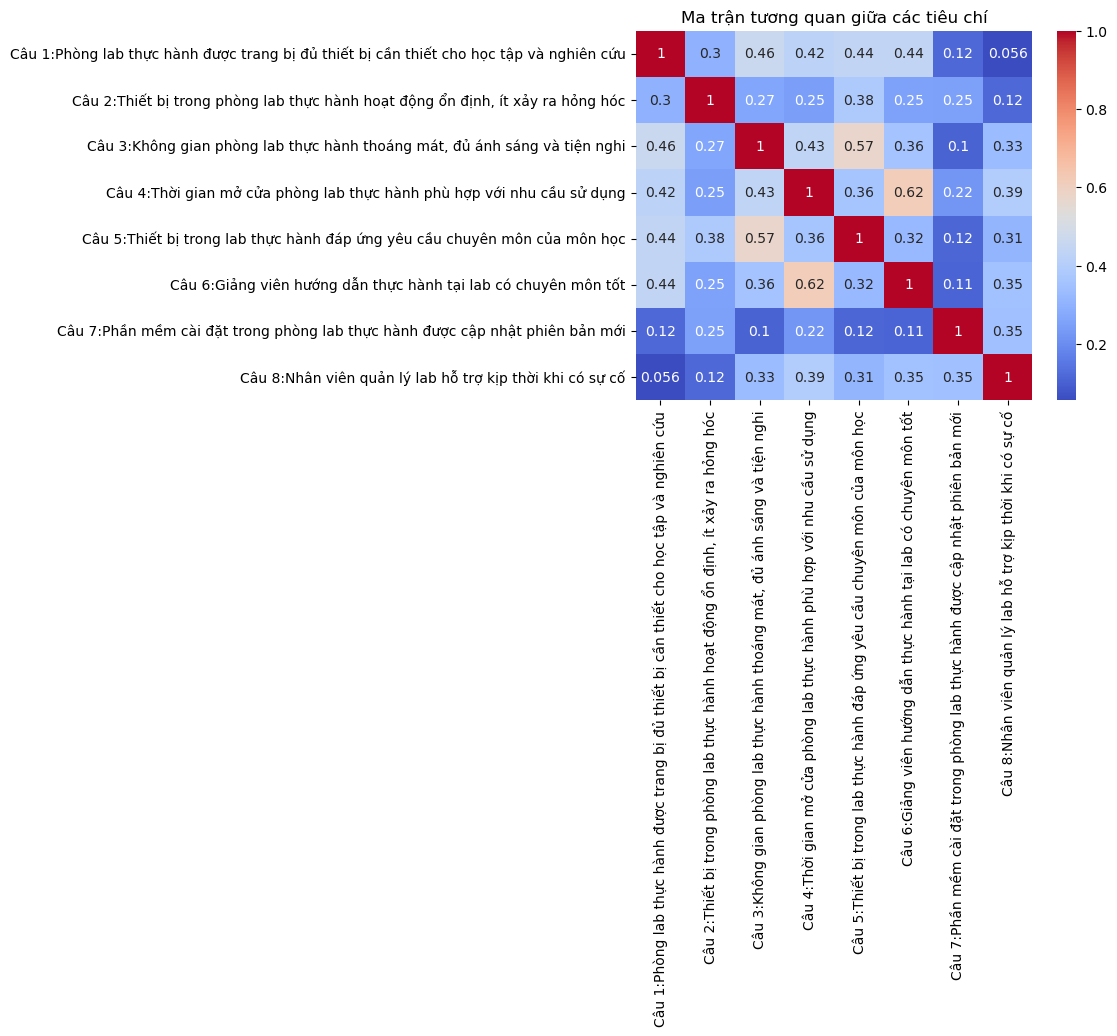

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

description_stats = df.describe()
value_counts = df.iloc[:, 3:11].apply(pd.Series.value_counts)
correlation_matrix = df.iloc[:, 3:11].corr()

# Trực quan hóa ma trận tương quan bằng heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Ma trận tương quan giữa các tiêu chí')

#### 2.4.4 Các yếu tố quan trọng ảnh hưởng đến kết quả

- Thiết kế khảo sát: bao gồm việc chọn đúng đối tượng nghiên cứu, định nghĩa rõ ràng các biến đo lường, lựa chọn phương pháp thu thập dữ liệu phù hợp, thiết kế câu hỏi, độ dài khảo sát, thứ tự các câu hỏi, và việc đảm bảo tính nhất quán và độ tin cậy của câu hỏi.
- Mẫu khảo sát: cần được lựa chọn một cách ngẫu nhiên hoặc ngẫu nhiên hợp lý, đại diện cho đúng đối tượng nghiên cứu và đảm bảo tính khả thi trong việc thu thập dữ liệu. Kích thước mẫu cũng cần đủ lớn để đạt được độ chính xác và độ tin cậy.
- Phương pháp khảo sát: Phương pháp khảo sát phải được lựa chọn sao cho phù hợp với mục đích của nghiên cứu và đảm bảo tính đáng tin cậy của kết quả khảo sát.
- Câu trả lời của các bạn sinh viên: bao gồm mức độ chính xác, độ trung thực, khả năng hiểu và đọc hiểu câu hỏi, cũng như sự đồng nhất trong cách đánh giá và trả lời.
- Thời gian khảo sát: Thời gian khảo sát phải đảm bảo đủ thời gian để thu thập đầy đủ thông tin cần thiết và đáp ứng mục tiêu nghiên cứu.
- Xử lý dữ liệu: là bước quan trọng để đảm bảo tính chính xác của kết quả khảo sát. Việc kiểm tra, lọc và chuyển đổi dữ liệu, tính toán các chỉ số, đánh giá tính đúng đắn và độ tin cậy của kết quả là yếu tố quan trọng ảnh hưởng đến kết quả của khảo sát.
- Nhiễu và sai số: bao gồm sai số trong quá trình thu thập dữ liệu, sai số có thể làm giảm tính chính xác và độ tin cậy của kết quả khảo sát.
- Độ tin cậy và độ chính xác của công cụ đo lường.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
df1 = df.iloc[:, 3:11]
df1.columns = [f"Câu {i}" for i in range(1, 9)]

X = df1[['Câu 1', 'Câu 2', 'Câu 3', 'Câu 4', 'Câu 5', 'Câu 6', 'Câu 7', 'Câu 8']]
# Chuẩn hóa dữ liệu
X_scaled = StandardScaler().fit_transform(X)

# Áp dụng PCA
pca = PCA()
pca.fit(X_scaled)
importance = pd.Series(pca.components_[0], index=X.columns).abs().sort_values(ascending=False)

print("Yếu tố quan trọng nhất ảnh hưởng đến xu hướng đánh giá tổng thể:")
print(importance)

Yếu tố quan trọng nhất ảnh hưởng đến xu hướng đánh giá tổng thể:
Câu 4    0.418732
Câu 3    0.404845
Câu 5    0.396653
Câu 6    0.393201
Câu 1    0.370046
Câu 8    0.299714
Câu 2    0.289605
Câu 7    0.195422
dtype: float64


#### 2.4.5 Trực quan hóa dữ liệu và kết quả 

<Figure size 1000x600 with 0 Axes>

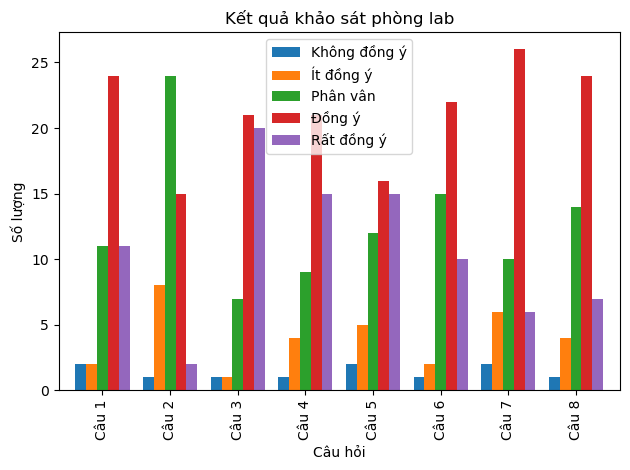

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
chuyendoi.plot(kind='bar', width=0.8)

plt.title('Kết quả khảo sát phòng lab')
plt.xlabel('Câu hỏi')
plt.ylabel('Số lượng')
plt.legend(['Không đồng ý', 'Ít đồng ý', 'Phân vân', 'Đồng ý', 'Rất đồng ý'])

plt.tight_layout()
plt.show()

**Nhận xét**\
Ưu điểm:
- Phòng lab được trang bị đủ thiết bị, đáp ứng nhu cầu học tập và nghiên cứu (Câu 1, 5).
- Thiết bị hoạt động ổn định, ít hỏng hóc (Câu 2).
- Không gian thoáng mát, đủ ánh sáng (Câu 3).
- Giảng viên có chuyên môn tốt, nhân viên hỗ trợ kịp thời (Câu 6, 8).
- Phần mềm được cập nhật thường xuyên (Câu 7).
  
Hạn chế cần cải thiện:
- Một số ý kiến có thể phản ánh về thời gian mở cửa chưa linh hoạt (Câu 4).
- Cần kiểm tra lại chất lượng thiết bị nếu có ý kiến không hài lòng (Câu 1, 2, 5).
  
Đề xuất:
- Xem xét điều chỉnh giờ mở cửa phòng lab để phù hợp hơn với nhu cầu sinh viên.
- Tăng cường bảo trì thiết bị và cập nhật phần mềm định kỳ.
- Phân tích thêm các đề xuất cụ thể từ sinh viên (Câu 9-11) để có giải pháp nâng cao chất lượng.

            Câu 1  Câu 2  Câu 3  Câu 4  Câu 5  Câu 6  Câu 7  Câu 8
Trung bình   3.80   3.18   4.16   3.90   3.74   3.76   3.56   3.64


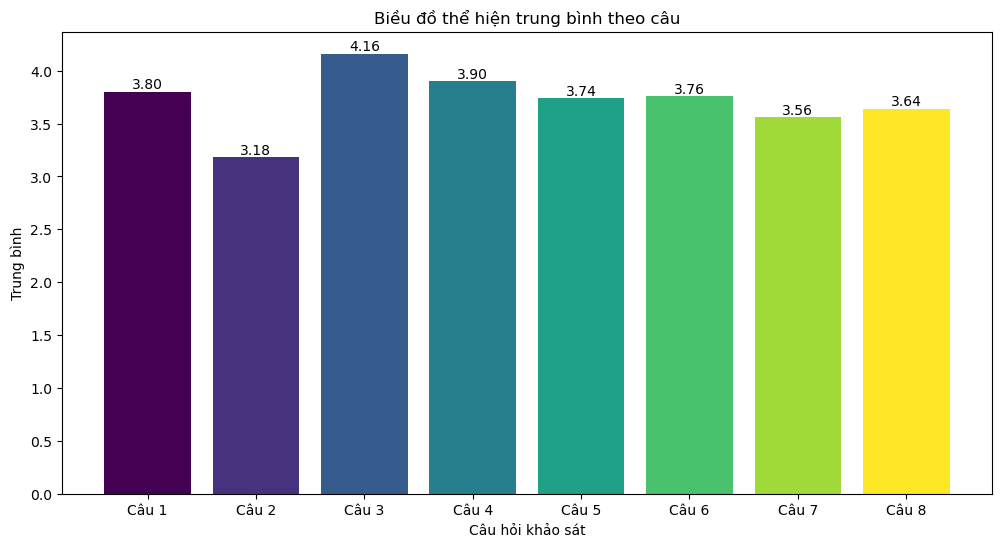

In [28]:
import matplotlib.pyplot as plt
import numpy as np

means = Sum.iloc[:, 1:].apply(lambda col: sum(col * range(1, len(col)+1)) / sum(col), axis=0).round(2)
means = means.to_frame().T.rename(columns={i: f"Câu {i}" for i in range(1, 11)}, index={0: 'Trung bình'})
print(means.to_string(index=True, header=True, float_format='%.2f'))
colors = plt.cm.viridis(np.linspace(0, 1, len(means.columns)))

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(means.columns, means.values.flatten(), color=colors)
ax.set_xlabel('Câu hỏi khảo sát')
ax.set_ylabel('Trung bình')
ax.set_title('Biều đồ thể hiện trung bình theo câu')

for i, v in enumerate(means.values.flatten()):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

Nhận xét:
- Đánh giá tích cực chiếm ưu thế, đặc biệt là mức "Đồng ý", nổi bật ở Câu 3 và Câu 5.
- "Không đồng ý" xuất hiện rất ít, tập trung chủ yếu ở Câu 7 và Câu 8.
- Câu 3 (không gian phòng lab) được đánh giá cao nhất với 45% "Rất đồng ý", trong khi Câu 7 chỉ đạt 12%.
- Câu 7 và Câu 8 có tỷ lệ "Phân vân" cao, cho thấy cần cải thiện phần mềm và hỗ trợ nhân viên.
- Đề xuất: nâng cấp phần mềm (Câu 7), đào tạo nhân viên (Câu 8), khảo sát thêm về Câu 4 (thời gian mở cửa) do "Phân vân" cao (25%).

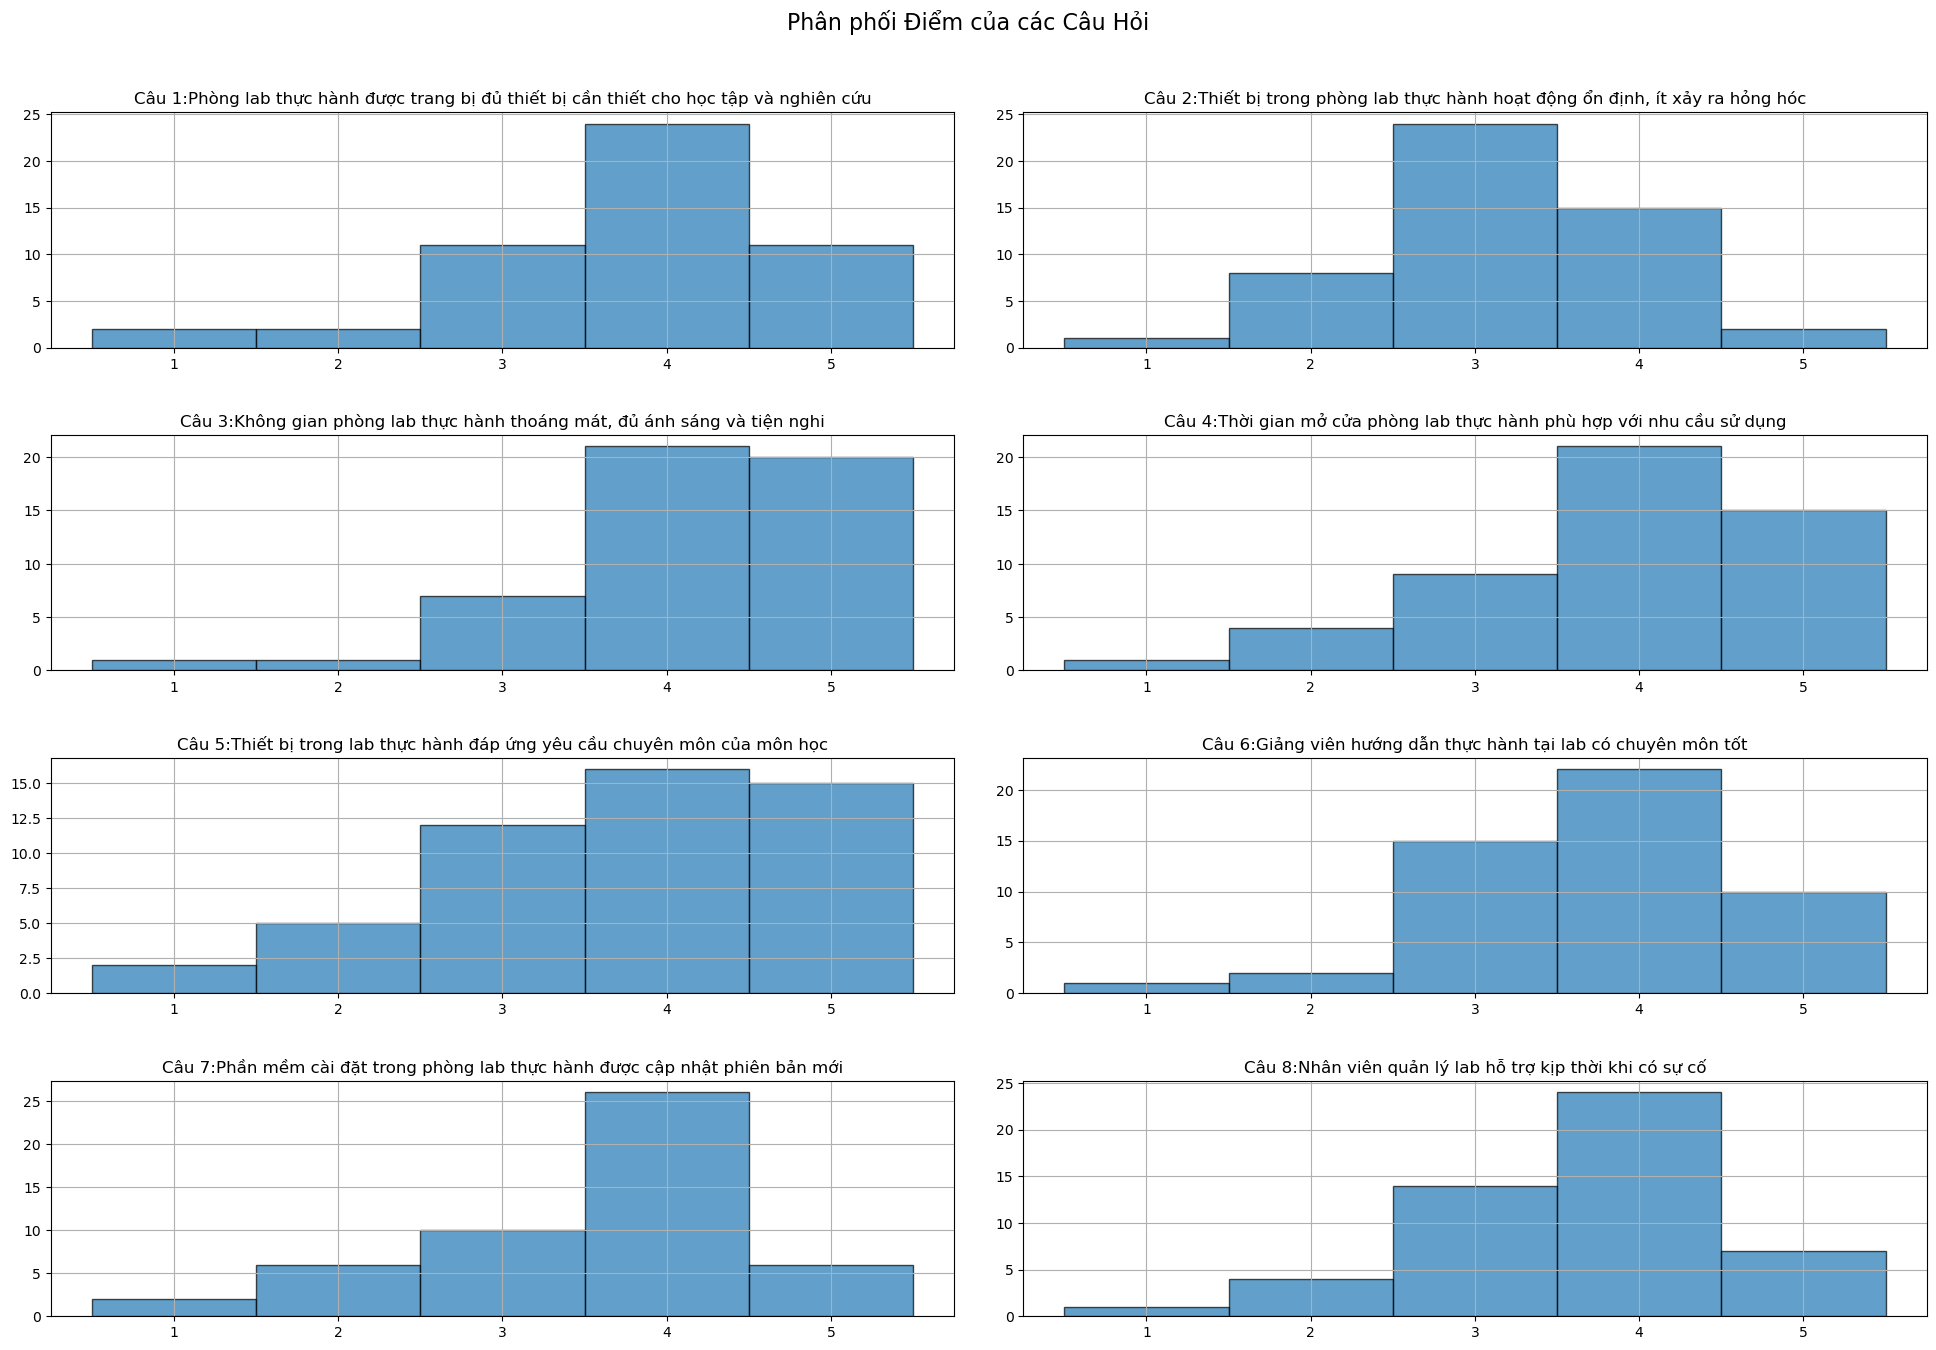

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))

for i in range(1, 9):  
    plt.subplot(4, 2, i)  
    df.iloc[:, i+2].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)
    plt.title(df.columns[i+2])
    plt.xticks([1, 2, 3, 4, 5]) 
plt.suptitle('Phân phối Điểm của các Câu Hỏi', fontsize=16)
plt.tight_layout(pad=3.0)  
plt.show()